In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from tqdm import tqdm
from FashionMnist import FashionCNN, test_loader
import matplotlib.pyplot as plt

In [5]:
# Hyper-parameters 
NUM_EPOCHS = 5
BATCH_SIZE = 100
LEARNING_RATE = 0.001
NUM_ROUND = 3
ROUND_DICT = {}


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = FashionCNN().to(device)

In [7]:
for round_idx in range(NUM_ROUND):
        print(f"\nEvaluate Round {round_idx + 1}:\n")
        model_path = f"./model_round_{round_idx + 1}.pt"
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.eval()

        # Define loss function
        criterion = nn.CrossEntropyLoss()

        # Evaluate on test data
        with torch.no_grad():
            total_loss = 0.0
            n_correct = 0
            n_samples = 0

            for images, labels in tqdm(test_loader):
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                
                # Calculate loss
                loss = criterion(outputs, labels)
                total_loss += loss.item() * images.size(0)  # Multiply by batch size to get total loss
                
                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                n_samples += labels.size(0)
                n_correct += (predicted == labels).sum().item()

            avg_loss = total_loss / n_samples
            accuracy = 100.0 * n_correct / n_samples

            print(f'Average loss on the test set: {avg_loss}')
            print(f'Accuracy of the network: {accuracy} %')
        
            ROUND_DICT[f"round_{round_idx + 1}"] = {
                "accuracy": accuracy,
                "avg_loss": avg_loss
            }
    #print(ROUND_DICT)


Evaluate Round 1:



100%|██████████| 100/100 [00:01<00:00, 54.79it/s]


Average loss on the test set: 0.36099271923303605
Accuracy of the network: 87.34 %

Evaluate Round 2:



100%|██████████| 100/100 [00:01<00:00, 53.06it/s]


Average loss on the test set: 0.303197021484375
Accuracy of the network: 88.69 %

Evaluate Round 3:



100%|██████████| 100/100 [00:01<00:00, 56.05it/s]

Average loss on the test set: 0.28489048674702644
Accuracy of the network: 89.74 %


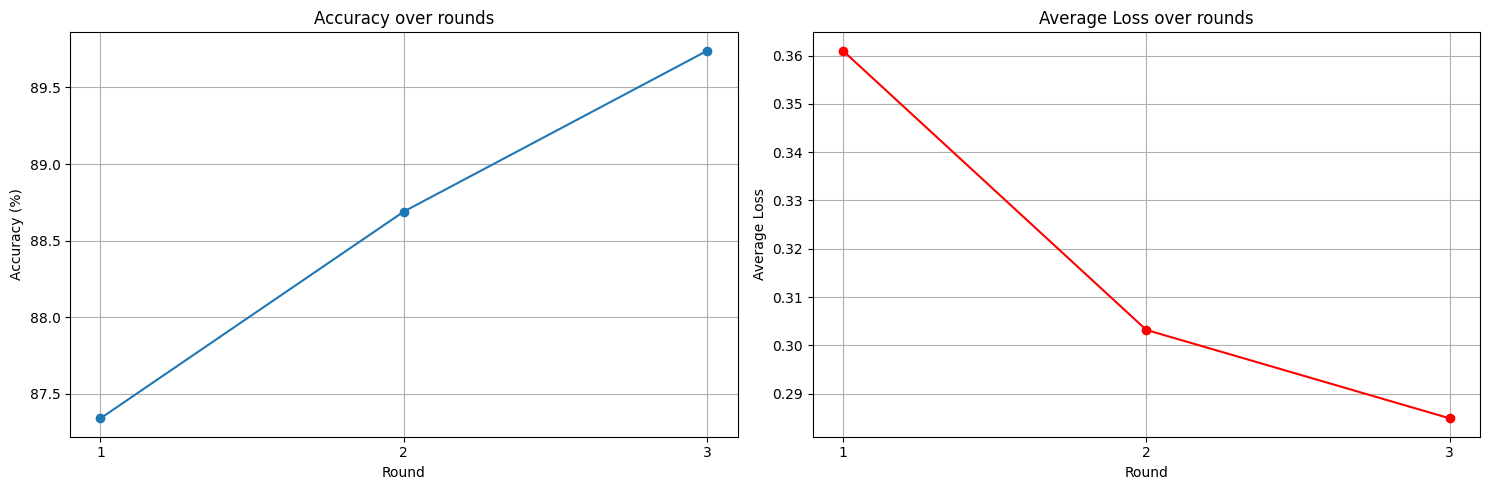

In [8]:
# Extract accuracy and avg_loss values from round_dict
accuracies = [ROUND_DICT[f"round_{i+1}"]["accuracy"] for i in range(NUM_ROUND)]
avg_losses = [ROUND_DICT[f"round_{i+1}"]["avg_loss"] for i in range(NUM_ROUND)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axs[0].plot(range(1, NUM_ROUND + 1), accuracies, marker='o')
axs[0].set_title('Accuracy over rounds')
axs[0].set_xlabel('Round')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_xticks(range(1, NUM_ROUND + 1))
axs[0].grid(True)

# Plot average loss
axs[1].plot(range(1, NUM_ROUND + 1), avg_losses, marker='o', color='red')
axs[1].set_title('Average Loss over rounds')
axs[1].set_xlabel('Round')
axs[1].set_ylabel('Average Loss')
axs[1].set_xticks(range(1, NUM_ROUND + 1))
axs[1].grid(True)

plt.tight_layout()
plt.show()
